In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
day_ts_df = pd.read_csv("../data/interum/day_timeseries.zip")

In [16]:
day_ts_df.release_date = pd.to_datetime(day_ts_df.release_date)
day_ts_df = day_ts_df.sort_values("release_date").set_index("release_date").copy()

In [30]:
# choose any attribute to 'len' to get total number of released songs per month
month_ts_df = day_ts_df.resample("m").agg({"Danceability":len})
month_ts_df.columns = ["num_releases"]

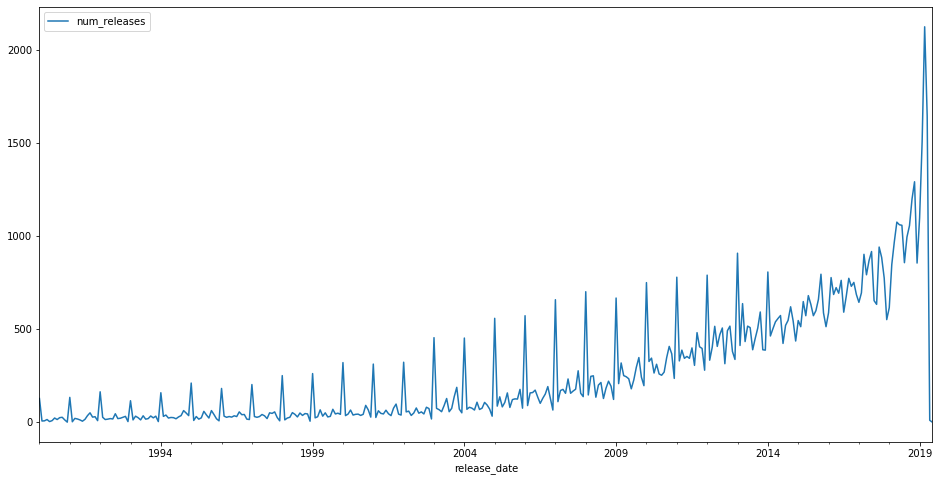

In [34]:
month_ts_df["1990":].plot(figsize=(16,8))
plt.show()

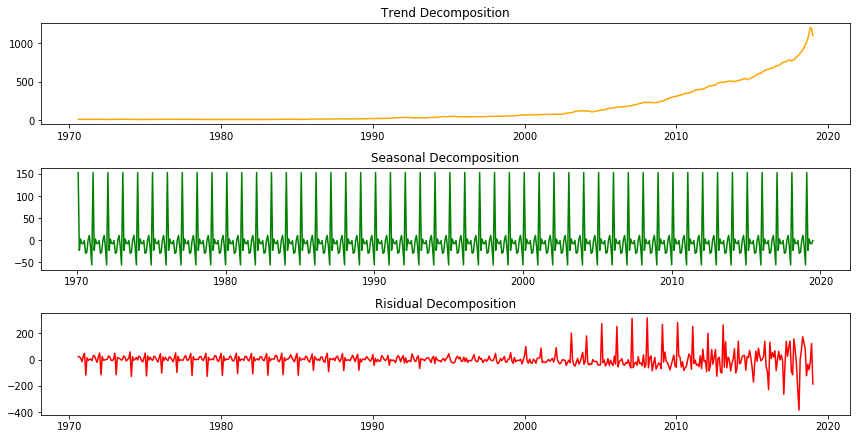

In [33]:
decomposition = seasonal_decompose(month_ts_df["1970":])

# Gather the trend, seasonality and risidual (noise) of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the various graphs
plt.figure(figsize=(12,8))

plt.subplot(412)
plt.plot(trend, label='Trend', color="orange")
plt.title("Trend Decomposition")

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="green")
plt.title("Seasonal Decomposition")

plt.subplot(414)
plt.plot(residual, label='Residuals', color="red")
plt.title("Risidual Decomposition")

plt.tight_layout()